# Bài tập 4


Triệu Nhật Minh - 21127112

---

## Import necessary libraries

In [51]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Generalization Error

## 1.

The VC bound is given by:

$$
N \geq \frac{8}{\epsilon^2} \ln (\frac{4m_H(2N)}{\delta})
$$

The approximation bound is given by: $m_H(N) \approx N^{d_{\text{VC}}}$

$$
\Rightarrow N \geq \frac{8}{\epsilon^2} \ln (\frac{4(2N)^{d_{\text{VC}}}}{\delta})
$$

$$
\Rightarrow \epsilon \leq \sqrt{\frac{8}{N} \ln (\frac{4(2N)^{d_{\text{VC}}}}{\delta})}
$$

We have $d_{\text{VC}} = 10$, $\delta = 1 - 0.95 = 0.05$, $\epsilon = 0.05$.

We need to find $N$ such that:

$$
0.05 \leq \sqrt{\frac{8}{N} \ln (\frac{4(2N)^{10}}{0.05})}
$$

In [52]:
def solve_numerical_approx(dVC, delta, epsilon):
    """
    Find the closest numerical approximation of sample size N.

    Args:
        dVC (int): VC dimension
        delta (float): confidence level
        epsilon (float): generalization error
    """
    const = 8 / epsilon**2
    threshold = 1
    
    N = 400000  # Initial guess since all N >= 400000
    N_prev = 0
    
    while abs(N - N_prev) >= threshold:
        N_prev = N
        N = const * math.log((4 * ((2 * N_prev)**dVC)) / delta)
    
    return N

In [53]:
solve_numerical_approx(10, 0.05, 0.05)

452956.8576881683

[1] The correct answer is [d] 460 000.

## 2.

Since $d_{\text{VC}} = 50$, we have $N > d_{\text{VC}}$. Therefore, we can use the approximation bound:

$$
m_H(N) = N^{d_{\text{VC}}}
$$

In [54]:
# Implement the bound functions

def mH(N, dVC):
    return np.float64(np.exp(dVC * np.log(np.float64(N)))) # N^dVC = e^(dVC * log(N)), N is float64 to avoid overflow

def original_VC(N, dVC, delta):
    return np.sqrt((8/N) * np.log(4 * mH(2*N, dVC) / delta))

def rademacher_penalty(N, dVC, delta):
    return np.sqrt((2 * np.log(2 * N * mH(N, dVC))) / N) + np.sqrt((2/N) * np.log(1/delta)) + (1/N)

max_iter = 100

def parrondo_van_den_broek(N, dVC, delta):
    epsilon = np.ones_like(N)  # initial guess
    for _ in range(max_iter):
        epsilon_prev = epsilon
        epsilon = np.sqrt((1/N) * (2 * epsilon_prev + np.log(6 * mH(2*N, dVC) / delta)))
        if np.all(np.abs(epsilon - epsilon_prev) < 0.1):
            break
    return epsilon

def devroye(N, dVC, delta):
    epsilon = np.ones_like(N)  # initial guess
    for _ in range(max_iter):
        epsilon_prev = epsilon
        left = 4 * epsilon_prev * (1 + epsilon_prev)
        right = np.log(4) + 2 * dVC * np.log(N) - np.log(delta)
        epsilon = np.sqrt((1/(2*N)) * (left + right))
        if np.all(np.abs(epsilon - epsilon_prev) < 0.1):
            break
    return epsilon

In devration bound, we have:
$$
\ln m_H(N^2) = \ln N^{2d_{\text{VC}}} = 2d_{\text{VC}} \ln N
$$

By using mathematically transformation, we can handle the large value of $N$.

In [55]:
def solve_smallest_bound_functions(N_start, N_end):
    dVC = 50
    delta = 0.05
    N_values = np.arange(N_start, N_end+1)
    
    arr_vc = [original_VC(N, dVC, delta) for N in N_values]
    arr_rademacher = [rademacher_penalty(N, dVC, delta) for N in N_values]
    arr_parrondo = [parrondo_van_den_broek(N, dVC, delta) for N in N_values]
    arr_devroye = [devroye(N, dVC, delta) for N in N_values]

    plt.plot(N_values, arr_vc, label="original VC")
    plt.plot(N_values, arr_rademacher, label="rademacher")
    plt.plot(N_values, arr_parrondo, label="parrondo")
    plt.plot(N_values, arr_devroye, label="devroye")
    
    plt.legend()
    plt.show()

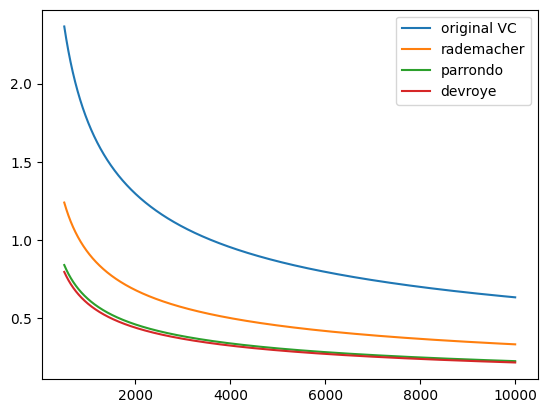

In [56]:
solve_smallest_bound_functions(N_start=500, N_end=10000)

From this plot, we acknowledge that the Devroye bound is the smallest one.

However, let's take a look at the plot with $N_{\text{start}} = 5000$.

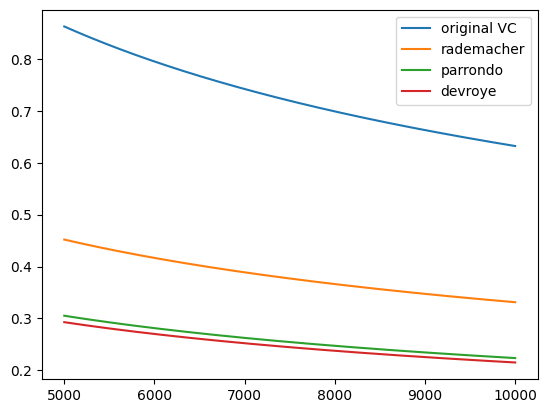

In [57]:
solve_smallest_bound_functions(N_start=5000, N_end=10000)

[2] The correct answer is [d] Devroye bound: $\epsilon \leq \sqrt{\frac{1}{2N}(4\epsilon(1 + \epsilon) + \ln (\frac{4m_H(N^2)}{\delta}))}$

## 3.

Since $d_{\text{VC}} = 50$, we have $N < d_{\text{VC}}$ and the approximation bound is not valid anymore. In this case, we have to use the original growth function:

$$
m_H(N) = 2^N
$$

In [58]:
def mH(N, dVC):
    return 2**(N)

def original_VC(N, dVC, delta):
    return np.sqrt((8/N) * np.log(4 * mH(2*N, dVC) / delta))

def rademacher_penalty(N, dVC, delta):
    return np.sqrt((2 * np.log(2 * N * mH(N, dVC))) / N) + np.sqrt((2/N) * np.log(1/delta)) + (1/N)

max_iter = 100

def parrondo_van_den_broek(N, dVC, delta):
    epsilon = np.ones_like(N)  # initial guess
    for _ in range(max_iter):
        epsilon_prev = epsilon
        epsilon = np.sqrt((1/N) * (2 * epsilon_prev + np.log(6 * mH(2*N, dVC) / delta)))
        if np.all(np.abs(epsilon - epsilon_prev) < 0.1):
            break
    return epsilon

def devroye(N, dVC, delta):
    epsilon = np.ones_like(N)  # initial guess
    for _ in range(max_iter):
        epsilon_prev = epsilon
        left = 4 * epsilon_prev * (1 + epsilon_prev)
        right = np.log(4) + 2 * dVC * np.log(N) - np.log(delta)
        epsilon = np.sqrt((1/(2*N)) * (left + right))
        if np.all(np.abs(epsilon - epsilon_prev) < 0.1):
            break
    return epsilon

In [59]:
def solve_smallest_bound_functions_small_N(N_start, N_end):
    dVC = 50
    delta = 0.05
    N_values = np.arange(N_start, N_end+1)
    
    arr_vc = [original_VC(N, dVC, delta) for N in N_values]
    arr_rademacher = [rademacher_penalty(N, dVC, delta) for N in N_values]
    arr_parrondo = [parrondo_van_den_broek(N, dVC, delta) for N in N_values]
    arr_devroye = [devroye(N, dVC, delta) for N in N_values]

    plt.plot(N_values, arr_vc, label="original VC")
    plt.plot(N_values, arr_rademacher, label="rademacher")
    plt.plot(N_values, arr_parrondo, label="parrondo")
    plt.plot(N_values, arr_devroye, label="devroye")
    
    plt.legend()
    plt.show()

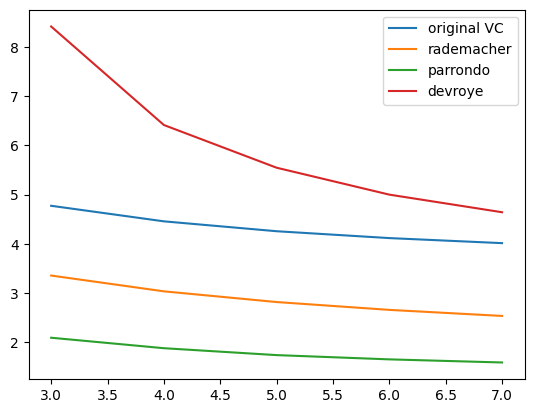

In [60]:
solve_smallest_bound_functions_small_N(N_start=3, N_end=7)

With large N, the Devroye bound is the smallest one. However, with small N, the Parrondo and Van den Broek bound is the smallest one.

[3] The correct answer is [c] Parrondo and Van den Broek bound: $\epsilon \leq \sqrt{\frac{1}{N}(2\epsilon + \ln (\frac{6m_H(2N)}{\delta}))}$

# Bias and Variance

$$
\mathbb{E}_{\mathcal{D}}[(g^{D}(x) - \bar{g}(x))^2] = \mathbb{E}_{\mathcal{D}}[g^{D}(x)^2] - \mathbb{E}_{\mathcal{D}}[\bar{g}(x)^2]
$$

## 4.

We can estimate the average function for any $x$ by 
$$
\bar{g}(x) \approx \frac{1}{K} \sum_{k=1}^{K} g^{D_k}(x)
$$ 
with $g^{D_k}(x)$ denotes the hypothesis function learned from the $k$-th dataset.


The given learning model consists of all hypotheses of the form $h(x) = ax$, so we have the transformation of the average function:

$$
\bar{g}(x) \approx \frac{1}{K} \sum_{k=1}^{K} g^{D_k}(x)
$$

$$
\Rightarrow \bar{g}(x) \approx \frac{1}{K} \sum_{k=1}^{K} a_k \cdot x
$$

$$
\Rightarrow \bar{g}(x) \approx \frac{1}{K} \cdot x \sum_{k=1}^{K} a_k
$$

$$
\Rightarrow \bar{g}(x) \approx x \cdot \hat{a}
$$

$$
\Rightarrow \bar{g}(x) \approx \hat{a} \cdot x
$$

In [61]:
def f(x):
    return np.sin(np.pi * x)

def calculate_coefficient(n_samples):
    X = np.random.uniform(-1, 1, size=(n_samples, 1))

    # Generate N samples from uniform distribution [-1, 1].
     
    # We use size=(n_samples, 1) in np.random.uniform to generate n_samples samples, each with 1 element. Using size=n_samples would generate a single sample with n_samples elements, which doesn't align with our target function f: [-1, 1] -> R.
    
    y = f(X)
    a = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y) # Calculate the optimal coefficient 'a' for the linear hypothesis using the least squares formula.
    return a

In [62]:
def solve_expected_hypothesis(n_samples, n_experiments):
    a_values = [calculate_coefficient(n_samples) for _ in range(n_experiments)]
    return np.round(np.mean(a_values), 2)

n_samples = 2
n_experiments = 10000

print("g_bar(x) = {}x".format(solve_expected_hypothesis(n_samples, int(n_experiments))))

g_bar(x) = 1.44x


[4] The correct answer is the one which has exactly coefficient $\hat{a}$. Hence [e] is the correct answer because other 4 answers have different coefficients.

## 5.

Bias is defined as the difference between the average hypothesis and the target function, shown by the following equation:
$$\text{bias} = E_x \left(\bar{g}(x) - f(x) \right)^2$$

## 6.

## 7.

# VC Dimension

## 8.

$$
m_H(N+1) = 2m_H(N) - \binom{N}{q}
$$

with an integer $q \geq 1$ and $m_H(1) = 2$

In [69]:
def combination(n, k):
    if n < 0 or k < 0:
        raise ValueError("n and k must be non-negative.")
    return np.float64(math.factorial(n) / (math.factorial(k) * math.factorial(n - k)))

def growth_function(N, q):
    if N < 1 or q < 1:
        raise ValueError("N and q must be greater than or equal to 1.")
    
    m_H = np.zeros(N + 1)
    m_H[1] = 2  # base case

    for i in range(2, N + 1):
        if i <= q:
            m_H[i] = 2 * m_H[i - 1]
        else:
            m_H[i] = 2 * m_H[i - 1] - combination(i - 1, q)

    return m_H[N]

In [69]:
def combination(n, k):
    if n < 0 or k < 0:
        raise ValueError("n and k must be non-negative.")
    return np.float64(math.factorial(n) / (math.factorial(k) * math.factorial(n - k)))

def growth_function(N, q):
    if N < 1 or q < 1:
        raise ValueError("N and q must be greater than or equal to 1.")
    
    m_H = np.zeros(N + 1)
    m_H[1] = 2  # base case

    for i in range(2, N + 1):
        if i <= q:
            m_H[i] = 2 * m_H[i - 1]
        else:
            m_H[i] = 2 * m_H[i - 1] - combination(i - 1, q)

    return m_H[N]

Given that $q \geq 1$, we'll start our demonstration with a fixed $q = 2$.

The VC dimension of a hypothesis set is the greatest value of N for which the growth function $m_H(N)$ equals $2^N$. If $m_H(N+1) < 2^{N+1}$, then the VC dimension is N.

The provided growth function is defined recursively as:
$$
m_H(N + 1) = 2m_H(N) - \binom{N}{q}
$$

To find the VC dimension, we need to find the greatest value of N for which $m_H(N) = 2^N$. This is equivalent to finding the smallest value of N for which $m_H(N+1) < 2^{N+1}$.

We can achieve this by iterating over values of N, starting from 1, and checking if $m_H(N+1) < 2^{N+1}$. If this condition is met, we return N as the VC dimension.

In [ ]:
def combination(n, k):
    if n < 0 or k < 0:
        raise ValueError("n and k must be non-negative.")
    return np.float64(math.factorial(n) / (math.factorial(k) * math.factorial(n - k)))

def growth_function(N, q):
    if N < 1 or q < 1:
        raise ValueError("N and q must be greater than or equal to 1.")
    
    m_H = np.zeros(N + 1)
    m_H[1] = 2  # base case

    for i in range(2, N + 1):
        if i <= q:
            m_H[i] = 2 * m_H[i - 1]
        else:
            m_H[i] = 2 * m_H[i - 1] - combination(i - 1, q)

    return m_H[N]

In [68]:
def VC_dimension(q):
    N = 1
    while True:
        if growth_function(N + 1, q) < 2 ** (N + 1):
            return N
        N += 1   
q = 2
print("VC dimension of the hypothesis set: {}".format(VC_dimension(q)))

VC dimension of the hypothesis set: 2


The VC dimension is a measure of the complexity of a function class, and it is defined as the size of the largest set that can be shattered by the function class. A set is shattered by a function class if for any labeling of the set, there is a function in the class that agrees with the labeling. The growth function is a function that counts the number of distinct labelings that a function class can produce on a set of a given size. The growth function and the VC dimension are related by the following theorem:
Theorem. Let H be a function class with VC dimension d. Then, for any m≥d, the growth function satisfies
H(m)≤i=0∑d​(im​)
The proof of this theorem can be found in this lecture note or this book chapter. To find the VC dimension from the growth function, one can use the following algorithm:

Initialize d to zero.
While H(d)=2d, increment d by one.
Return d−1 as the VC dimension.


This algorithm works because the growth function is equal to 2m for all m≤d, and strictly less than 2m for all m>d. Therefore, the algorithm will stop at the first value of m that exceeds the VC dimension, and return the previous value.

The VC dimension is 2, which is equals to $q$, but we need to check again

## 9.

## 10.

## References

[1]

[2] [Exercise 2 - homefish, GitHub](https://github.com/homefish/edX_Learning_From_Data_2017/blob/master/homework_4/homework_4_problem_2_plot_bounds.ipynb)